In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
clean_q = pd.read_csv('cleaned_q.csv')
clean_q=clean_q.rename(columns={'Unnamed: 0':'date_q'})
clean_q=clean_q.set_index(clean_q['date_q'])

In [4]:
sales = clean_q['sales']

<AxesSubplot:xlabel='date_q'>

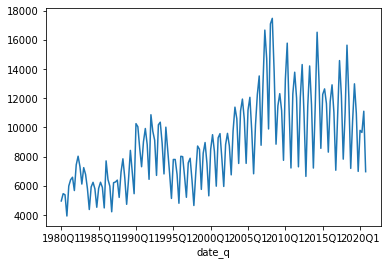

In [18]:
clean_q['nlist'].plot()

<AxesSubplot:xlabel='date_q'>

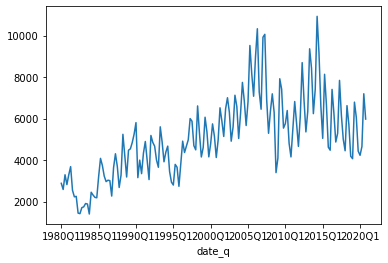

In [5]:
sales.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

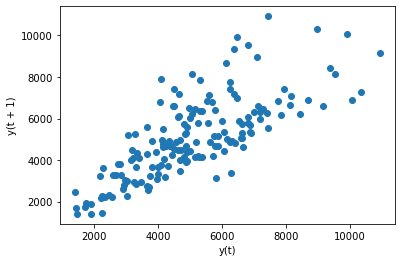

In [6]:
pd.plotting.lag_plot(sales)

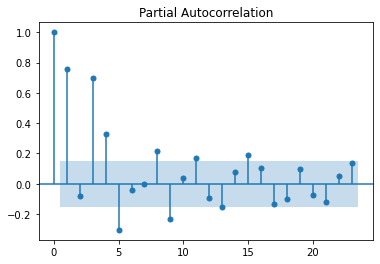

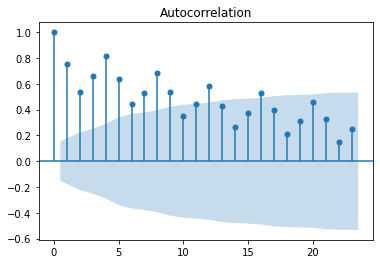

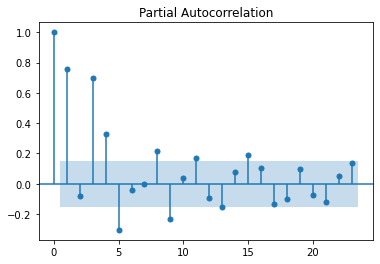

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(sales)
plot_pacf(sales)

## Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic', 'p-val', '# lags', 'N'])
    for key, val in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = val
    print(dfoutput)

In [12]:
adf_test(sales)

Results of Dickey-Fuller
Test statistic           -2.068496
p-val                     0.257370
# lags                   10.000000
N                       153.000000
Critical Value (1%)      -3.473830
Critical Value (5%)      -2.880623
Critical Value (10%)     -2.576945
dtype: float64


In [15]:
sales_diff = sales.diff()
sales_diff = sales_diff.dropna()

In [16]:
adf_test(sales_diff)

Results of Dickey-Fuller
Test statistic           -5.058467
p-val                     0.000017
# lags                   14.000000
N                       148.000000
Critical Value (1%)      -3.475325
Critical Value (5%)      -2.881275
Critical Value (10%)     -2.577293
dtype: float64


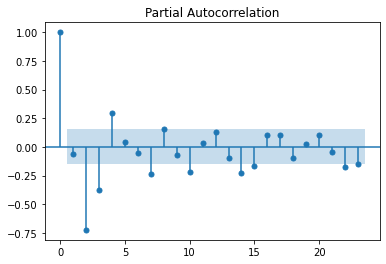

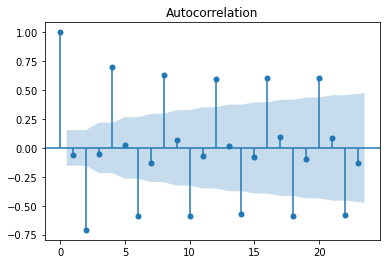

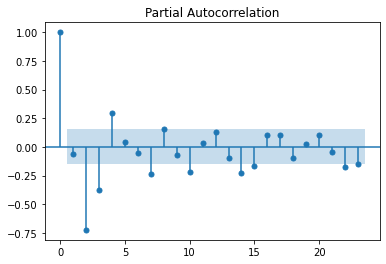

In [17]:
plot_acf(sales_diff)
plot_pacf(sales_diff)

In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales_diff,order=(5,0,3))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  163
Model:                 ARIMA(5, 0, 3)   Log Likelihood               -1318.163
Date:                Mon, 15 Feb 2021   AIC                           2656.327
Time:                        11:11:05   BIC                           2687.264
Sa

<AxesSubplot:xlabel='date_q'>

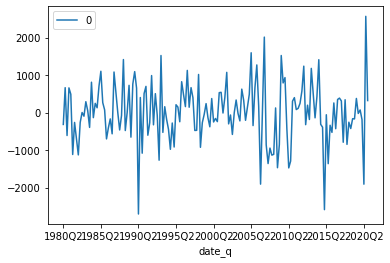

In [23]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [26]:
import math
from sklearn.metrics import mean_squared_error

val = sales_diff.values
size = int(len(val)*0.85)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(5,0,3))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=-1634.369327, expected=-1520.000000
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=1430.212738, expected=996.000000
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=1642.059110, expected=3005.000000
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=-1403.159209, expected=-930.000000
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: Convergen

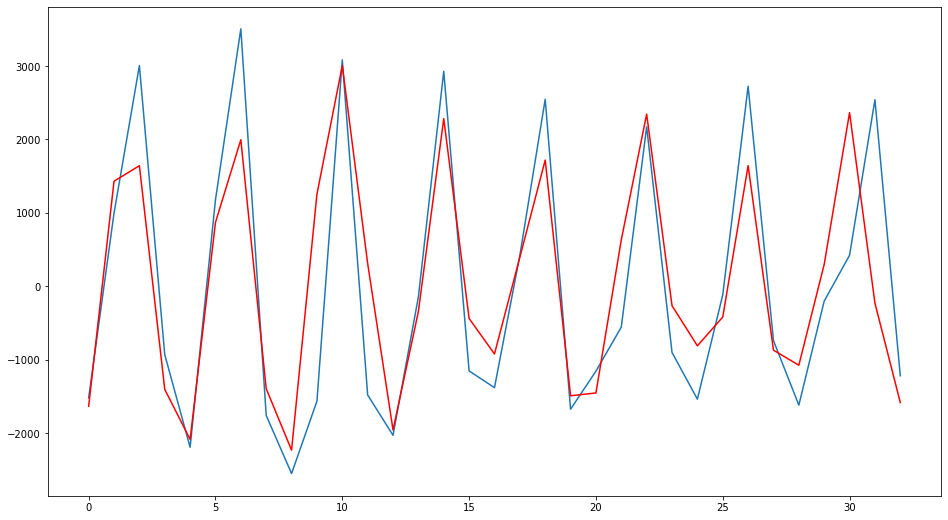

In [27]:
plt.figure(figsize=(16,9))
plt.plot(test,label='test')
plt.plot(predictions,label='predict',color='red')

In [42]:
history = sales[:size].values

In [48]:
for i in predictions:
    history=np.append(history,int(history[-1]+i))

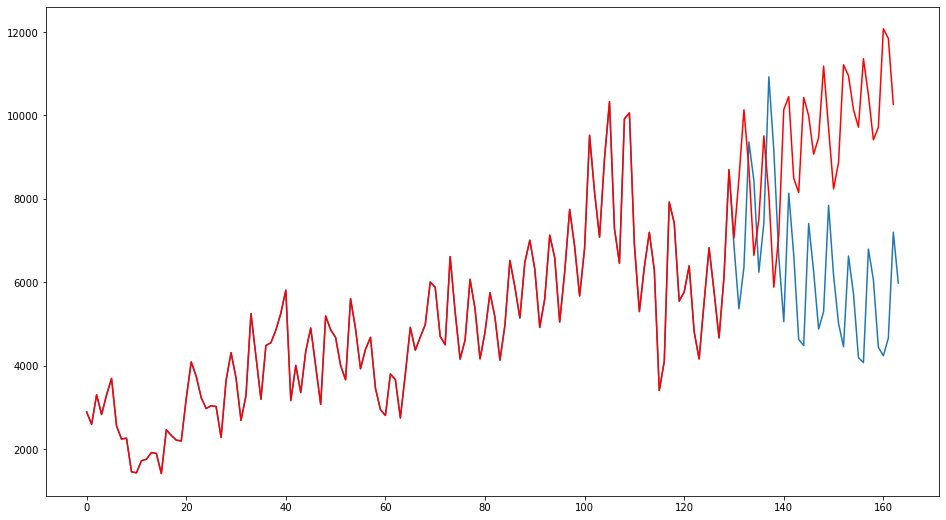

In [54]:
plt.figure(figsize=(16,9))
plt.plot(sales.values,label='test')
plt.plot(history,label='predict',color='red')

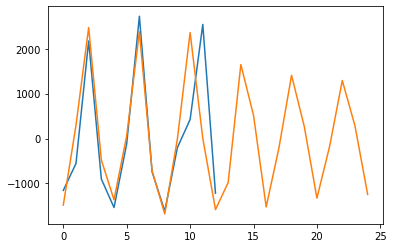

In [66]:
plt.plot(val[150:])
plt.plot(model_fit.predict(start=150,end=174))

In [67]:
len(sales)

164

In [71]:
history = sales.values
arima_fcast = model_fit.predict(start=164, end = 175)

In [73]:
for i in arima_fcast:
    history=np.append(history,int(history[-1]+i))

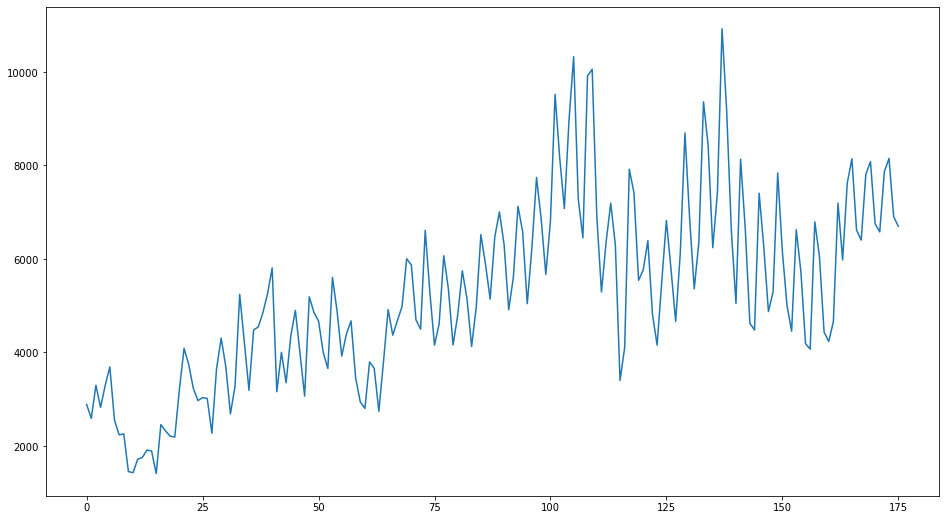

In [75]:
plt.figure(figsize=(16,9))
plt.plot(history,label='history + fcast')


In [88]:
history

2019Q1                 4071.000000
2019Q2                 6794.000000
2019Q3                 6054.000000
2019Q4                 4436.000000
2020Q1                 4234.000000
2020Q2                 4657.000000
2020Q3                 7197.000000
2020Q4                 5979.000000
2021-03-31 00:00:00    5092.842034
2021-06-30 00:00:00    6315.806960
2021-09-30 00:00:00    6955.990161
2021-12-31 00:00:00    5803.664857
2022-03-31 00:00:00    4933.177161
2022-06-30 00:00:00    6043.966770
2022-09-30 00:00:00    6720.175443
2022-12-31 00:00:00    5677.150570
2023-03-31 00:00:00    4816.263239
2023-06-30 00:00:00    5821.644597
2023-09-30 00:00:00    6523.061225
2023-12-31 00:00:00    5582.900422
dtype: float64

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


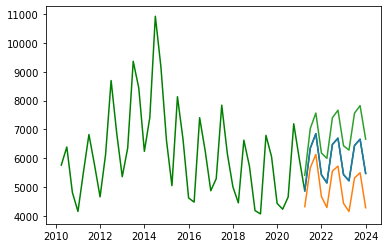

In [110]:
val = sales.values
model = ARIMA(val,order=(5,1,3))
model_fit=model.fit()
start_period = '2010'

f_cast = model_fit.get_forecast(12)
fcast_res = f_cast.summary_frame(alpha = 0.3)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = sales[start_period:]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start=start_period,periods=len(history),freq='q')
plt.plot(history,color='green')
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])

In [107]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mean error':me, 'mae': mae, 
            'mean percentage error': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [113]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(5,1,3))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
out_fcast=output.summary_frame(alpha=0.3)
rmse=math.sqrt(mean_squared_error(test,out_fcast['mean']))
print('RMSE: %.3f' % rmse)

RMSE: 923.832
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


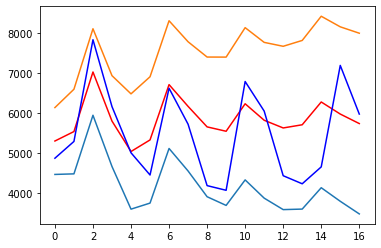

In [115]:
plt.plot(out_fcast['mean'],color='red')
plt.plot(out_fcast['mean_ci_lower'])
plt.plot(out_fcast['mean_ci_upper'])

plt.plot(test,color='blue')

In [108]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.153076784782815,
 'mean error': 350.49065208722425,
 'mae': 751.9415927517553,
 'mean percentage error': 0.09534847507945797,
 'rmse': 923.8317955798525,
 'corr': 0.6938158753563076,
 'minmax': 0.12524294546395864}

In [ ]:
f_cast = model_fit.get_forecast(12,alpha = 0.30)
fcast_res = f_cast.summary_frame()

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


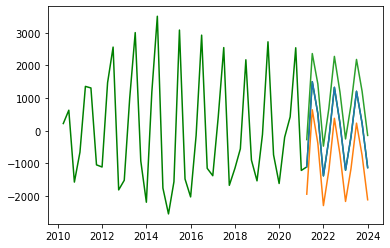

In [101]:
val = sales_diff.values
model = ARIMA(val,order=(5,0,3))
model_fit=model.fit()
start_period = '2010'

f_cast = model_fit.get_forecast(12)
fcast_res = f_cast.summary_frame(alpha = 0.3)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = sales_diff[start_period:]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start=start_period,periods=len(history),freq='q')
plt.plot(history,color='green')
plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])

## SARIMAX

In [127]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [116]:
prov_fcast = pd.read_csv('prov_forecasts.csv')
nat_fcast = pd.read_csv('nat_forecast.csv')
prov_fcast=prov_fcast.set_index('Unnamed: 0')
nat_fcast=nat_fcast.set_index('date')


In [117]:
nat_exog = nat_fcast[['Interest rate on fixed 5-year mortgages [%]','World Price Oil (West Texas Intermediate)']]
nat_exog=nat_exog.rename(columns={
    'Interest rate on fixed 5-year mortgages [%]':'morg_rate',
    'World Price Oil (West Texas Intermediate)':'wti'
})
nat_exog=nat_exog[:'2024']
comm_fcast =pd.read_csv('comm_fore.csv')
nat_exog.wti[164:] = comm_fcast[116:].WTI



In [181]:
nat_exog.index = pd.period_range(start='1980',end='2023-12',freq='q')

In [118]:
prov_exog = prov_fcast[['Alberta_Unemployment rate','Alberta_Number of households']]

In [123]:
prov_exog.index = pd.period_range(start='1984',end = '2024-12',freq='q')

In [172]:
snl = pd.read_csv('snl_fcast.csv')
snl=snl.rename(columns={'Unnamed: 0':'date','0':'SNL'})
snl.index = pd.period_range(start='1980',end='2023-12',freq='q')


In [185]:
nat_exog=nat_exog.join(snl)

RMSE: 980.995
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


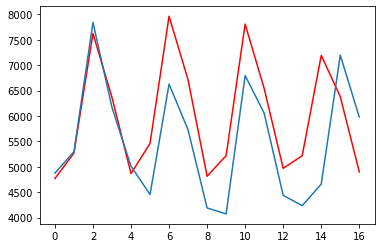

In [146]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog[['wti','morg_rate']][:164].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,3), seasonal_order=(1,1,1,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [132]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  147
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 4)   Log Likelihood               -1141.710
Date:                             Mon, 15 Feb 2021   AIC                           2305.420
Time:                                     16:10:13   BIC                           2337.935
Sample:                                          0   HQIC                          2318.633
                                             - 147                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            25.6912      8.002      3.211      0.001      10.008      41.374
x2          -422.4511    104.622     -4.038      0.000    -627.507    -217.395
ar.L1         -0.2280      0.372     -0.614      0.539      -0.956       0.500
ar.L2          0.1327      0.231      0.575      0.565      -0.319       0.585
ar.L3          0.5873      0.259      2.269      0.023       0.080       1.095
ma.L1          0.0713      0.475      0.150      0.881      -0.859       1.002
ma.L2         -0.4490      0.424     -1.059      0.289      -1.280       0.382
ma.L3         -0.6155      0.430     -1.432      0.152      -1.458       0.227
ar.S.L4        0.2669      0.169      1.579      0.114      -0.064       0.598
ma.S.L4       -0.8000      0.138     -5.780      0.000      -1.071      -0.529
sigma2      6.842e+05   2.12e+05      3.221      0.001    2.68e+05     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.04
Prob(Q):                              0.83   Prob(JB):                         0.13
Heteroskedasticity (H):               1.51   Skew:                             0.08
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [131]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.1509181020900975,
 'mean error': 497.25114283526295,
 'mae': 778.6025098438901,
 'mean percentage error': 0.10650578023241579,
 'rmse': 980.9946124962839,
 'corr': 0.7112614625715725,
 'minmax': 0.12405910162997491}

RMSE: 949.050
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


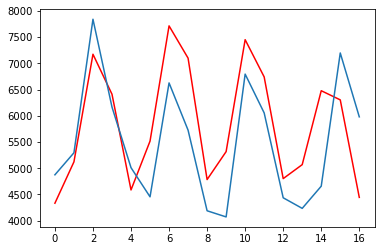

In [147]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog['wti'][:164].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,3), seasonal_order=(1,0,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [148]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.1591189880957787,
 'mean error': 337.2440374558473,
 'mae': 835.677813869833,
 'mean percentage error': 0.07737581418255036,
 'rmse': 949.0500001863387,
 'corr': 0.6816239485153596,
 'minmax': 0.1370687817842211}

In [149]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  147
Model:             SARIMAX(3, 1, 3)x(1, 0, [], 4)   Log Likelihood               -1181.027
Date:                            Mon, 15 Feb 2021   AIC                           2380.055
Time:                                    16:20:08   BIC                           2406.907
Sample:                                         0   HQIC                          2390.966
                                            - 147                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            29.2461     10.294      2.841      0.004       9.071      49.421
ar.L1          0.8366      0.115      7.270      0.000       0.611       1.062
ar.L2         -0.9925      0.031    -32.151      0.000      -1.053      -0.932
ar.L3          0.8139      0.102      7.957      0.000       0.613       1.014
ma.L1         -1.0242      0.118     -8.676      0.000      -1.256      -0.793
ma.L2          0.8789      0.136      6.477      0.000       0.613       1.145
ma.L3         -0.7997      0.120     -6.663      0.000      -1.035      -0.564
ar.S.L4        0.1164      0.152      0.766      0.444      -0.181       0.414
sigma2      7.772e+05   1.12e+05      6.941      0.000    5.58e+05    9.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.64   Prob(JB):                         0.06
Heteroskedasticity (H):               1.49   Skew:                             0.01
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE: 851.915
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


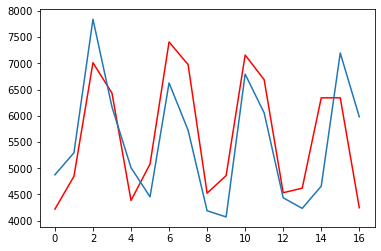

In [158]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog['wti'][:164].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,2), seasonal_order=(1,0,0,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [155]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.134338613075595,
 'mean error': 121.2319763904774,
 'mae': 726.5808005260158,
 'mean percentage error': 0.033362664329765104,
 'rmse': 851.9150437882852,
 'corr': 0.7237095252083303,
 'minmax': 0.12112375084522709}

RMSE: 866.970
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


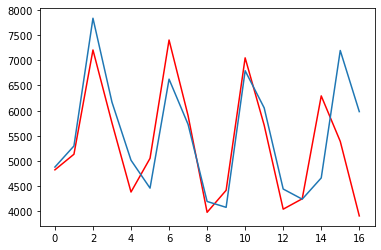

In [161]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog[['wti','morg_rate']][:164].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,2), seasonal_order=(1,1,1,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [162]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.11002553343843884,
 'mean error': -174.46912918188156,
 'mae': 619.875639159688,
 'mean percentage error': -0.021160020162584416,
 'rmse': 866.9695475078404,
 'corr': 0.7119652373508324,
 'minmax': 0.10249479863208577}

In [163]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  147
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 4)   Log Likelihood               -1144.283
Date:                             Mon, 15 Feb 2021   AIC                           2308.565
Time:                                     16:40:20   BIC                           2338.123
Sample:                                          0   HQIC                          2320.576
                                             - 147                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            21.1094      6.967      3.030      0.002       7.455      34.764
x2          -424.3686    112.794     -3.762      0.000    -645.440    -203.297
ar.L1          0.8205      0.149      5.511      0.000       0.529       1.112
ar.L2         -0.8768      0.127     -6.916      0.000      -1.125      -0.628
ar.L3          0.1037      0.181      0.573      0.567      -0.251       0.459
ma.L1         -0.9421      0.114     -8.267      0.000      -1.165      -0.719
ma.L2          0.8973      0.136      6.609      0.000       0.631       1.163
ar.S.L4        0.0101      0.187      0.054      0.957      -0.357       0.377
ma.S.L4       -0.7857      0.113     -6.958      0.000      -1.007      -0.564
sigma2      7.662e+05   1.22e+05      6.281      0.000    5.27e+05    1.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.47
Prob(Q):                              0.71   Prob(JB):                         0.18
Heteroskedasticity (H):               1.54   Skew:                            -0.08
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE: 1003.350
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


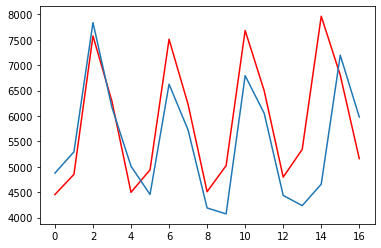

In [164]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog['morg_rate'][:164].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,2), seasonal_order=(1,1,1,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [165]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  147
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 4)   Log Likelihood               -1144.483
Date:                             Mon, 15 Feb 2021   AIC                           2306.965
Time:                                     16:57:59   BIC                           2333.568
Sample:                                          0   HQIC                          2317.775
                                             - 147                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -369.8350     91.544     -4.040      0.000    -549.257    -190.413
ar.L1          0.5901      0.712      0.829      0.407      -0.805       1.985
ar.L2          0.0644      0.626      0.103      0.918      -1.162       1.290
ar.L3          0.1891      0.108      1.745      0.081      -0.023       0.401
ma.L1         -0.7312      0.758     -0.964      0.335      -2.217       0.755
ma.L2         -0.2687      0.738     -0.364      0.716      -1.716       1.179
ar.S.L4        0.2280      0.188      1.216      0.224      -0.140       0.595
ma.S.L4       -0.8136      0.096     -8.491      0.000      -1.001      -0.626
sigma2      5.456e+05   8.36e-05   6.53e+09      0.000    5.46e+05    5.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.18
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               1.54   Skew:                            -0.29
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.37e+27. Standard errors may be unstable.
"""

RMSE: 850.071
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


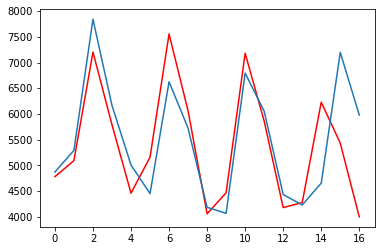

In [228]:
val = sales.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog[['wti','morg_rate']][:164].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,2), seasonal_order=(0,1,1,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [223]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  147
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 4)   Log Likelihood               -1143.996
Date:                             Mon, 15 Feb 2021   AIC                           2305.992
Time:                                     19:24:26   BIC                           2332.594
Sample:                                          0   HQIC                          2316.802
                                             - 147                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            26.3734      6.376      4.136      0.000      13.876      38.871
x2          -422.3316    100.991     -4.182      0.000    -620.271    -224.392
ar.L1          0.8457      0.114      7.412      0.000       0.622       1.069
ar.L2         -0.9078      0.106     -8.579      0.000      -1.115      -0.700
ar.L3          0.0548      0.127      0.431      0.666      -0.194       0.304
ma.L1         -0.9745      0.071    -13.648      0.000      -1.114      -0.835
ma.L2          0.9892      0.135      7.353      0.000       0.726       1.253
ma.S.L4       -0.7718      0.084     -9.234      0.000      -0.936      -0.608
sigma2      7.456e+05   1.62e+05      4.592      0.000    4.27e+05    1.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.75   Prob(JB):                         0.45
Heteroskedasticity (H):               1.57   Skew:                            -0.05
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.10954994276368739,
 'mean error': -105.21068969258722,
 'mae': 619.5333742730993,
 'mean percentage error': -0.00833577746573338,
 'rmse': 850.0706260688628,
 'corr': 0.7161098191164511,
 'minmax': 0.10135352177371915}

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


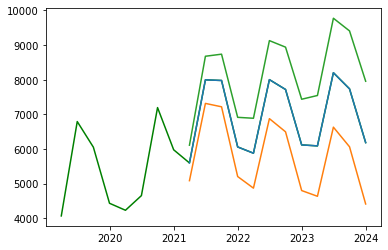

In [367]:
val = sales.values

exog = nat_exog[['morg_rate','wti']][:164].values
exog_fcast = nat_exog[['morg_rate','wti']][164:176]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.5)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = sales['2019':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2019',end='2024',freq='q')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [364]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  164
Model:             SARIMAX(3, 1, 1)x(0, 1, 1, 4)   Log Likelihood               -1284.241
Date:                           Wed, 17 Feb 2021   AIC                           2584.483
Time:                                   22:20:39   BIC                           2609.034
Sample:                                        0   HQIC                          2594.453
                                           - 164                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -393.8519     81.144     -4.854      0.000    -552.892    -234.812
x2            26.8423      5.791      4.635      0.000      15.493      38.192
ar.L1          0.2517      1.701      0.148      0.882      -3.082       3.586
ar.L2         -0.1871      0.243     -0.771      0.441      -0.662       0.288
ar.L3          0.1390      0.416      0.334      0.739      -0.677       0.955
ma.L1         -0.3755      1.695     -0.221      0.825      -3.698       2.947
ma.S.L4       -0.7696      0.079     -9.752      0.000      -0.924      -0.615
sigma2      5.757e+05   4.89e+04     11.777      0.000     4.8e+05    6.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                24.09
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.21
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

RMSE: 939.716
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


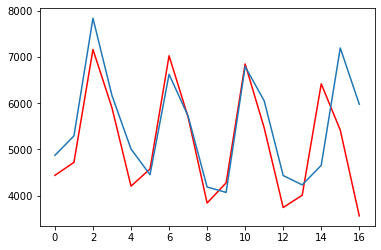

In [239]:
val = sales[1:].values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = nat_exog[['wti','morg_rate']].diff().dropna()[:163].values

exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,1,2), seasonal_order=(0,1,1,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'],color='red')
plt.plot(test)

In [236]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  146
Model:             SARIMAX(3, 1, 2)x(0, 1, [1], 4)   Log Likelihood               -1140.897
Date:                             Mon, 15 Feb 2021   AIC                           2299.794
Time:                                     20:32:09   BIC                           2326.333
Sample:                                          0   HQIC                          2310.579
                                             - 146                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.3588      6.505      1.439      0.150      -3.390      22.108
x2           -94.0798     98.232     -0.958      0.338    -286.610      98.451
ar.L1         -0.9889      0.517     -1.913      0.056      -2.002       0.024
ar.L2         -0.3265      0.304     -1.074      0.283      -0.922       0.269
ar.L3         -0.3208      0.149     -2.156      0.031      -0.612      -0.029
ma.L1          0.8734      0.557      1.567      0.117      -0.219       1.966
ma.L2         -0.1085      0.321     -0.338      0.736      -0.738       0.521
ma.S.L4       -0.8000      0.081     -9.898      0.000      -0.958      -0.642
sigma2      6.343e+05   7.69e+04      8.249      0.000    4.84e+05    7.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.41
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [243]:
exog_fcast['wti'][:]=70.0

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


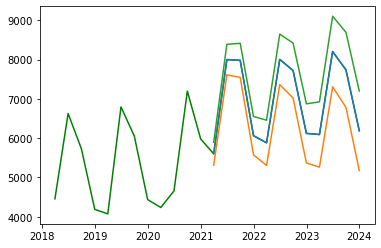

In [374]:
val = sales.values

exog = nat_exog[['morg_rate','wti']][:164].values
exog_fcast = nat_exog[['morg_rate','wti']][164:176]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.7)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

history = sales['2018':]
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2018',end='2024',freq='q')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [375]:
fcast_res.to_csv('sales_fcast_1.csv')

In [340]:
out = sales.append(fcast_res['mean'])
out.index = pd.period_range(start='1980',end='2023-12',freq='q')

In [287]:
out.to_csv('sales_fcast.csv')

In [284]:
fcast_res[['mean','mean_ci_lower','mean_ci_upper']].to_csv('sales_fcast_only.csv')

In [267]:
prov_exog.index = pd.period_range(start='1984',end='2024-12',freq='q')

In [270]:
sales.index =pd.period_range(start='1980',end='2020-12',freq='q')

<AxesSubplot:>

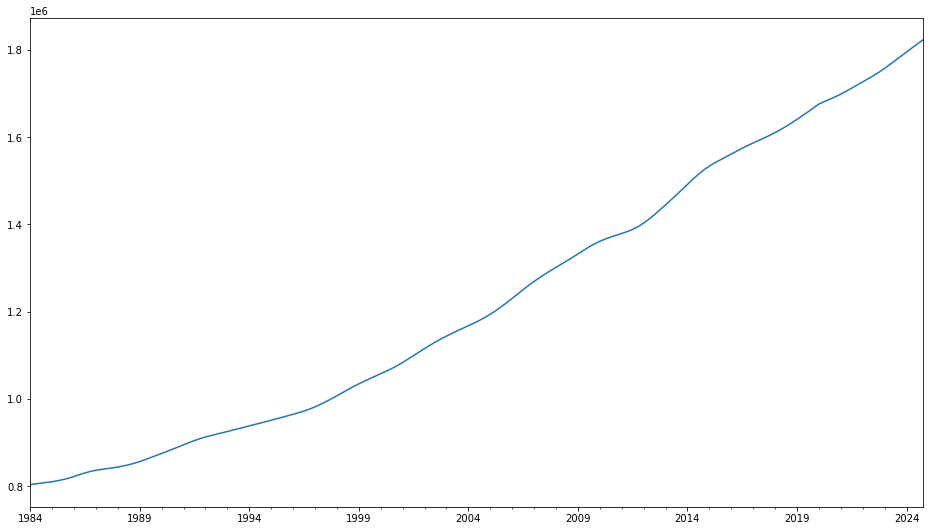

In [275]:
prov_exog['Alberta_Number of households'].plot(figsize=(16,9))

<AxesSubplot:xlabel='date_q'>

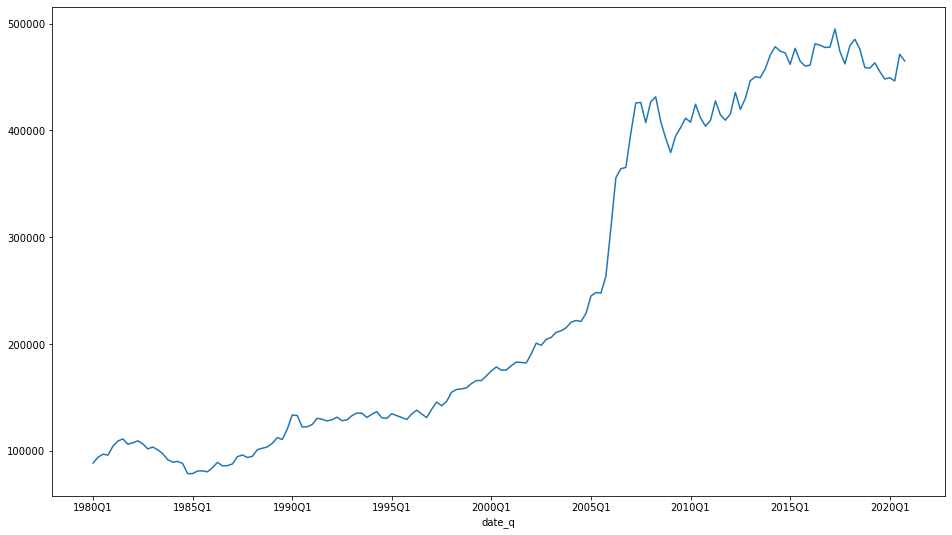

In [277]:
clean_q['avg_price'].plot(figsize=(16,9))

<AxesSubplot:>

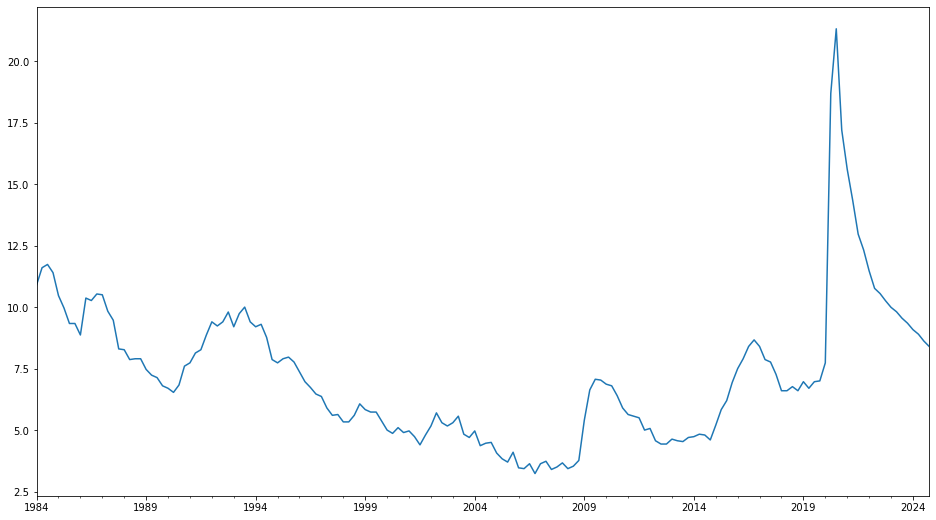

In [273]:
prov_exog['Alberta_Unemployment rate'].plot(figsize=(16,9))

In [366]:
fcast_res['mean_ci_lower']['2021'].sum()

20796.975256391703

In [365]:
fcast_res['mean_ci_lower']

2021-03-31    4352.093889
2021-06-30    6338.684600
2021-09-30    6127.677628
2021-12-31    3978.519139
2022-03-31    3422.370546
2022-06-30    5257.850407
2022-09-30    4740.599704
2022-12-31    2907.788722
2023-03-31    2545.171579
2023-06-30    4371.150222
2023-09-30    3660.963112
2023-12-31    1867.905975
Freq: Q-DEC, Name: mean_ci_lower, dtype: float64

In [343]:
out['2021'].sum()/out['2020'].sum()

1.252494367638077

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


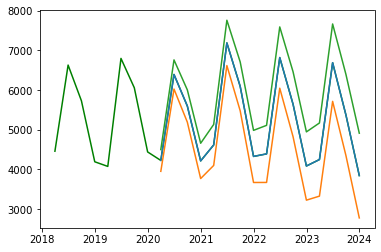

In [369]:
val = sales[:'2019'].values

exog = nat_exog[['morg_rate','wti']][:160].values
exog_fcast = nat_exog[['morg_rate','wti']][160:176]

model = SARIMAX(val,order=(3,1,1), seasonal_order=(0,1,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(16,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.7)
fcast_res.index= pd.date_range(start='2020',periods=16,freq='q')

history = sales['2018':'2019']
history=history.append(fcast_res['mean'])
history.index = pd.date_range(start='2018',end='2024',freq='q')
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [370]:
fcast_res['mean']['2021'].sum()

22207.73616521449

In [372]:
fcast_res.to_csv('sales_fcast_2.csv')